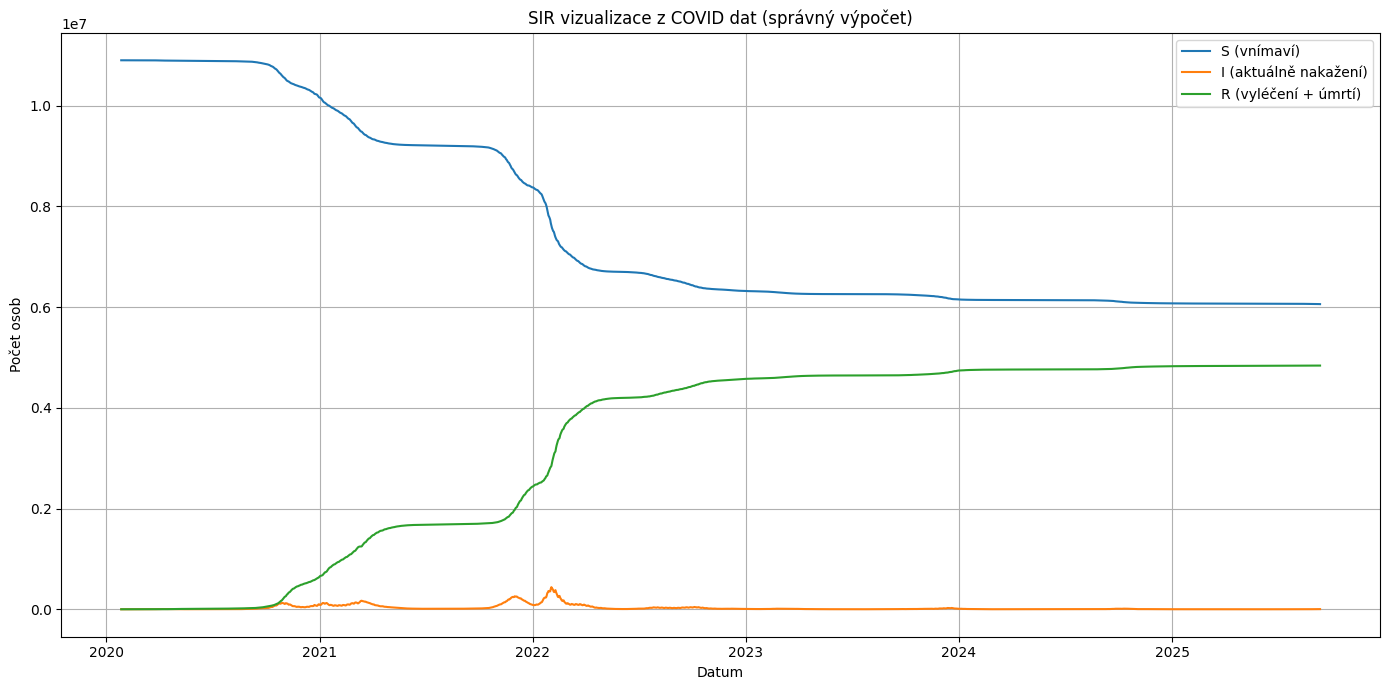

In [176]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# === Načtení a příprava dat ===
data = pd.read_csv("data_covid.csv")           # nebo absolutní cesta, pokud je potřeba
data["datum"] = pd.to_datetime(data["datum"])
data = data.sort_values("datum")

# === Parametry ===
pop_total = 10.9e6  # velikost populace (ČR ~ 10.9 mil.)

# === SIR ze skutečných dat ===
# R = vyléčení + úmrtí
R = data["kumulativni_pocet_vylecenych"] + data["kumulativni_pocet_umrti"]

# I = aktuálně nakažení = kumulativně nakažení − (vyléčení + úmrtí)
I = data["kumulativni_pocet_nakazenych"] - R
#I = data["prirustkovy_pocet_nakazenych"]

# S = vnímaví = populace − kumulativně nakažení
S = pop_total - data["kumulativni_pocet_nakazenych"]

# === Vizualizace (absolutní počty) ===
plt.figure(figsize=(14, 7))
plt.plot(data["datum"], S, label="S (vnímaví)")
plt.plot(data["datum"], I, label="I (aktuálně nakažení)")
plt.plot(data["datum"], R, label="R (vyléčení + úmrtí)")
plt.xlabel("Datum")
plt.ylabel("Počet osob")
plt.title("SIR vizualizace z COVID dat (správný výpočet)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

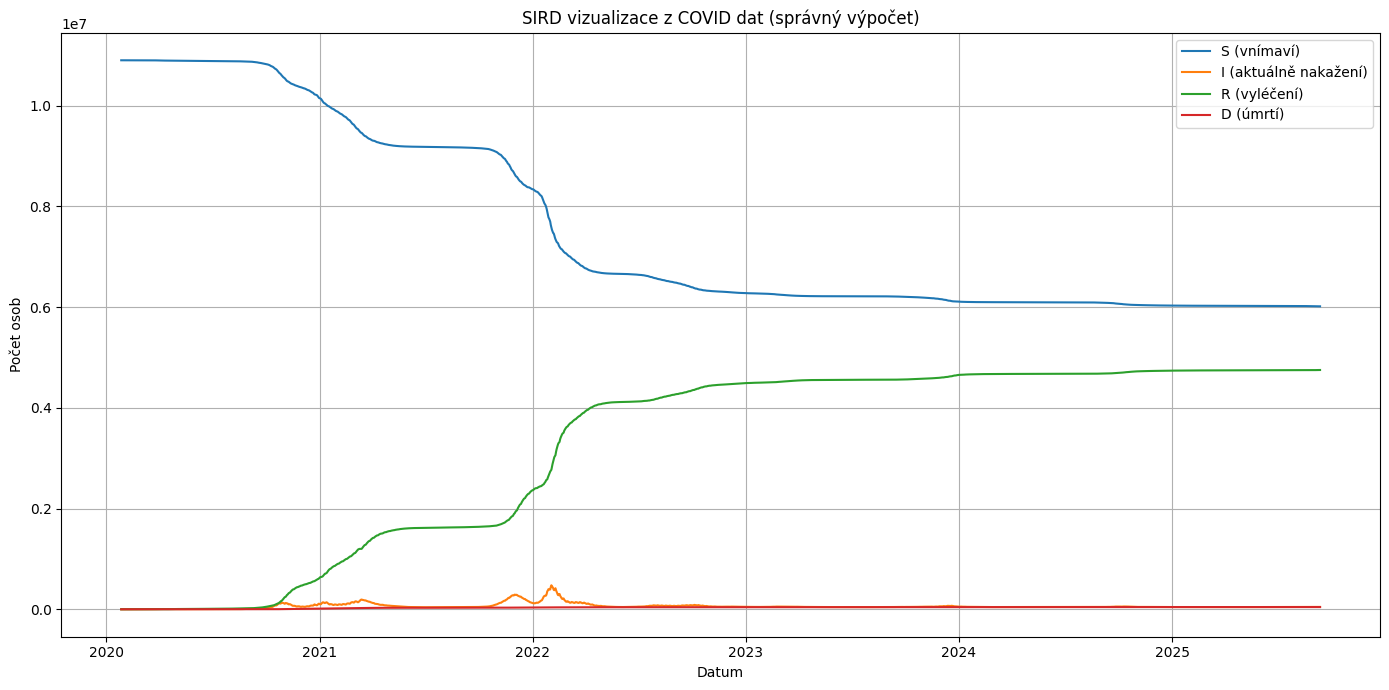

In [177]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# === Načtení a příprava dat ===
data = pd.read_csv("data_covid.csv")
data["datum"] = pd.to_datetime(data["datum"])
data = data.sort_values("datum")

# === Parametry ===
pop_total = 10.9e6  # velikost populace (ČR ~ 10.9 mil.)

# === SIR ze skutečných dat ===

# D = umrti
D = data["kumulativni_pocet_umrti"]

# R = vyléčení 
R = data["kumulativni_pocet_vylecenych"] - D

# I = aktuálně nakažení = kumulativně nakažení − (vyléčení + úmrtí)
I = data["kumulativni_pocet_nakazenych"] - R - D
#I = data["prirustkovy_pocet_nakazenych"]

# S = vnímaví = populace − kumulativně nakažení
S = pop_total - data["kumulativni_pocet_nakazenych"] - D


# === Vizualizace (absolutní počty) ===
plt.figure(figsize=(14, 7))
plt.plot(data["datum"], S, label="S (vnímaví)")
plt.plot(data["datum"], I, label="I (aktuálně nakažení)")
plt.plot(data["datum"], R, label="R (vyléčení)")
plt.plot(data["datum"], D, label="D (úmrtí)")
plt.xlabel("Datum")
plt.ylabel("Počet osob")
plt.title("SIRD vizualizace z COVID dat (správný výpočet)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [178]:
# Vyhledání parametrů
dR = data["prirustkovy_pocet_vylecenych"] + data["prirustkovy_pocet_umrti"]
gamma = dR / I

dI = I.diff()

S = pop_total - data["kumulativni_pocet_nakazenych"]
beta = ((dI / I) + gamma) / (S / pop_total)

print(f"parametry: \n Beta: {np.mean(beta)} | Gamma: {np.mean(gamma)}")


parametry: 
 Beta: 0.036499275319264245 | Gamma: 0.02510002106162422


Beta 0.35714285714285715
Gamma 0.35714285714285715
Final values:
S = 98000.67788130541
I = 2.094665162282259e-09
R = 901999.3221186919
True 0


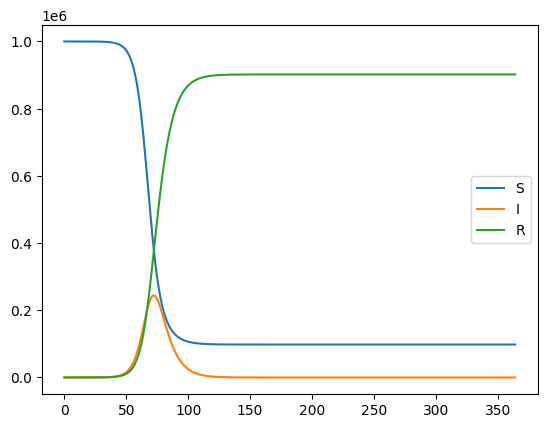

In [22]:
import numpy as np
import matplotlib.pyplot as plt

#T - čas, N - populace
def getSIR(T, N, beta, gamma, dt=1):
    S = np.zeros(T)
    I = np.zeros(T)
    R = np.zeros(T)

    # init
    S[0] = N - 1 # odečtu infikovaného
    I[0] = 1 # musím mít jednoho infikovaného
    R[0] = 0

    # vypočtu hodnoty v jednotlivých časových bodech
    for t in range(T-1):
        #vypočítám změny v časovém horizontu
        dS = -beta * S[t] * I[t] / N 
        dI = beta * S[t] * I[t] / N - gamma * I[t] 
        dR = gamma * I[t]

        #připočtu deltu
        S[t+1] = S[t] + dS * dt
        I[t+1] = I[t] + dI * dt
        R[t+1] = R[t] + dR * dt

    return S, I, R


D = 7 #7dní infikační doba - covid
R_0 = 2.5 #
beta = R_0 * 1/D
print("Beta", beta)
gamma = 1/D
print("Gamma", beta)

S, I, R = getSIR(365, int(1e6), beta=np.mean(beta), gamma=np.mean(gamma), dt=1)

print("Final values:")
print("S =", S[-1])
print("I =", I[-1])
print("R =", R[-1])

#simple check
print(int(1e6) == round(S[-1]+I[-1]+R[-1]),0)

plt.plot(S, label='S')
plt.plot(I, label='I')
plt.plot(R, label='R')
plt.legend()
plt.show()

## Lineární interpolace

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/LinearInterpolation.svg/1024px-LinearInterpolation.svg.png" width="400" height="400">

[np.float64(0.0), np.float64(11.11111111111111), np.float64(11.11111111111111), np.float64(22.22222222222222), np.float64(22.22222222222222), np.float64(33.33333333333333), np.float64(33.33333333333333), np.float64(44.44444444444444), np.float64(44.44444444444444), np.float64(55.55555555555556), np.float64(55.55555555555556), np.float64(66.66666666666666), np.float64(66.66666666666666), np.float64(77.77777777777777), np.float64(77.77777777777777), np.float64(88.88888888888889), np.float64(88.88888888888889), np.float64(100.0)]
[np.float64(-4.0), np.float64(119.45679012345678), np.float64(119.45679012345678), np.float64(489.82716049382714), np.float64(489.82716049382714), np.float64(1107.1111111111109), np.float64(1107.1111111111109), np.float64(1971.3086419753085), np.float64(1971.3086419753085), np.float64(3082.41975308642), np.float64(3082.41975308642), np.float64(4440.444444444443), np.float64(4440.444444444443), np.float64(6045.382716049382), np.float64(6045.382716049382), np.float

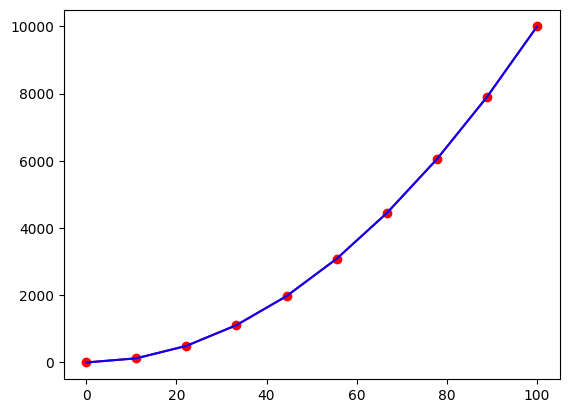

In [180]:
import numpy
import matplotlib.pyplot as plt


def linear(x, a, b):
    return f(a) + (f(b)-f(a))/(b-a)*(x-a)

def f(x):
    return x**2 - 4

x = np.linspace(0,100,10)
fy = f(x)
size = 2
def linearInterpolation(f,x,size):
    gx = []
    gy = []
    for i in range(len(x)-1):
        window = np.linspace(x[i], x[i+1], size)
        y_ = linear(window, x[i], x[i+1])
        gy.extend(y_)
        gx.extend(window)
    return gy, gx
y_, x_ = linearInterpolation(f,x,size)

print(x_)
print(y_)

plt.plot(x,fy,"r-o")
plt.plot(x_,y_,"b-")
plt.show()


## Interpolace - Vandermondova matice

<img src="./pics/vandermond.PNG" width="1200" height="400">

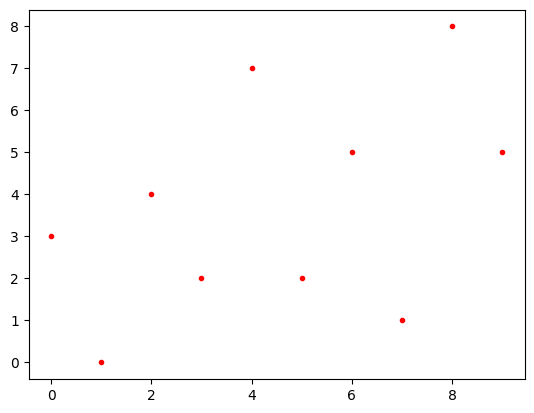

[0 1 2 3 4 5 6 7 8 9]
[3 0 4 2 7 2 5 1 8 5]


In [181]:
N = 10
x = np.arange(0,N)
y = np.random.randint(0,10,N)

plt.plot(x,y,'r.')
plt.show()

print(x)
print(y)

[[  1   0   0   0   0]
 [  1   1   1   1   1]
 [  1   2   4   8  16]
 [  1   3   9  27  81]
 [  1   4  16  64 256]]


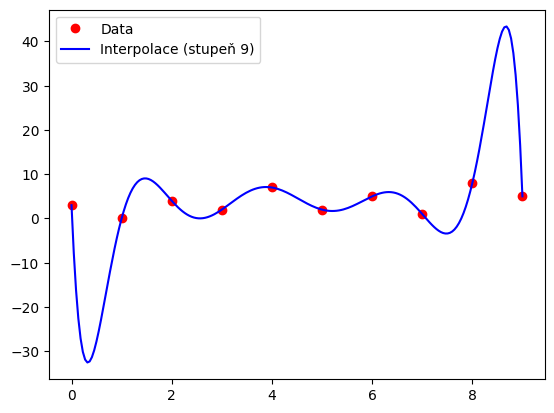

In [182]:

import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

N = len(x)  # stupen interpolace

# Vandermonde matice pro polynom stupně N-1
X = np.vander(x, N, increasing=True)
print(X[:5, :5])

# Řešení přesné interpolace: X @ a = y  -> a = koeficienty polynomu
a = la.solve(X, y)

x_in = np.linspace(x.min(), x.max(), 200)

gy = sum(a[k] * x_in**k for k in range(N))

# --- vizualizace ---
plt.plot(x, y, 'ro', label='Data')
plt.plot(x_in, gy, 'b-', label=f'Interpolace (stupeň {N-1})')
plt.legend()
plt.show()



## Lagrangova interpolace

<img src="./pics/lagrange.PNG" width="1400" height="400">

[ 1.          3.11111111  5.22222222  7.33333333  9.44444444 11.55555556
 13.66666667 15.77777778 17.88888889 20.        ]


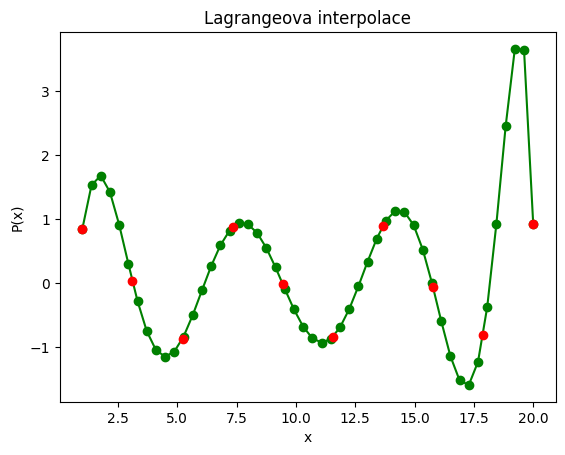

In [198]:
# moje funkce
def f(x):
    return np.sin(x)

xs = np.linspace(1,20,10)
ys = f(xs)

print(xs)

# vypočítá lagrangeův polynom v bodě x_eval | xs - vektor x; ys - vektor y
def lagrangeEval(x_eval, xs, ys):
    n = len(xs)
    Ln=0.0 # výsledný polynom
    for i in range(n):
        Li = 1.0
        for j in range(n):
            if i != j:
                Li*=((x_eval-xs[j])/(xs[i] - xs[j])) #pomocny polynom
            else:
                Li*=1
        Ln+=ys[i]*Li
    return Ln

# pole pro vykreslení
x_plot = np.linspace(min(xs), max(xs), 50)
y_plot = []

for xc in x_plot:
    temp = lagrangeEval(xc, xs, ys)
    y_plot.append(temp)


plt.plot(x_plot, y_plot, "go-")
plt.plot(xs, ys, "ro")
plt.xlabel("x")
plt.ylabel("P(x)")
plt.title("Lagrangeova interpolace")
plt.show()